In [2]:
!pip install scipy==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
import random
from matplotlib.pyplot import title
from numpy import linalg as LA


num_graphs = 4 # Total groups we have (G_ii)
betw_graphs = num_graphs*(num_graphs-1)/2 # Graphs needed to represent interlayer relations (G_ij, i!=j)

def generate_mat(n, p_inter, p_intra):
    # Generating intralayer relations graphs
    G_11 = nx.erdos_renyi_graph(n, p_intra)
    G_22 = nx.erdos_renyi_graph(n, p_intra)

    # Generating interlayer relations graphs
    G_12 = nx.erdos_renyi_graph(n, p_inter)
    G_21 = nx.erdos_renyi_graph(n, p_inter)

    # Adding random weights to our grpahs
    
    for (u, v) in G_11.edges():
        G_11.edges[u,v]['weight'] = random.randint(0,10)/10

    for (u, v) in G_22.edges():
        G_22.edges[u,v]['weight'] = random.randint(0,10)/10
    A11 = nx.to_numpy_array(G_11)
    A12 = nx.to_numpy_array(G_12)
    A21 = nx.to_numpy_array(G_21)
    A22 = nx.to_numpy_array(G_22)

    return G_11, G_12, G_21, G_22, A11, A12, A21, A22



def plot_graph(G):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=0.1)
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=0.1, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")
    # edge weight labels
    # edge_labels = nx.get_edge_attributes(G, "weight")
    # nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title('For '+str(G))
    plt.show()


def plot(G):
    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1)

    # edges
    nx.draw_networkx_edges(G, pos, width=0.1)
    nx.draw_networkx_edges(
        G, pos, width=0.1, alpha=0.5, edge_color="b"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title('For '+str(G))
    plt.show()




def compute_max(A11, A12, A21, A22):
    temp1 = np.hstack((A11, A12))
    temp2 = np.hstack((A21, A22))
    A = np.vstack((temp1, temp2))

    eig_A11 = LA.eigvals(A11)
    eig_A22 = LA.eigvals(A22)
    eig_A = LA.eigvals(A)
    # eig_A11 = [abs(ele) for ele in eig_A11]
    # eig_A22 = [abs(ele) for ele in eig_A22]
    # eig_A = [abs(ele) for ele in eig_A]
    
    max_A11 = np.max(eig_A11)
    max_A22 = np.max(eig_A22)
    max_A = np.max(eig_A)
    
    return max_A11, max_A22, max_A

In [9]:
G_11, G_12, G_21, G_22, A11, A12, A21, A22 = generate_mat(50, 0.05, 0.7)

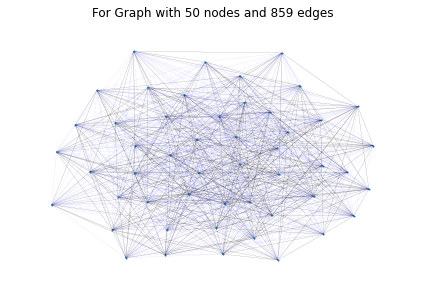

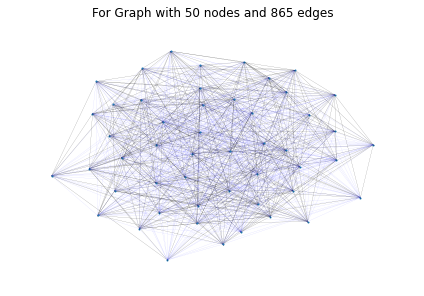

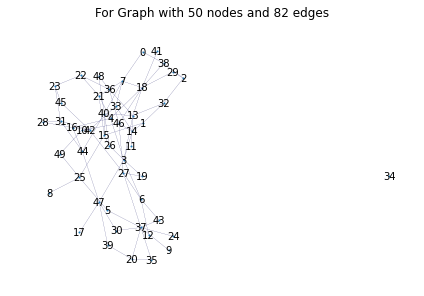

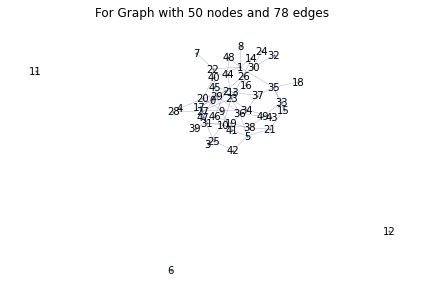

In [10]:
plot_graph(G_11)
plot_graph(G_22)
plot(G_12)
plot(G_21)

# Ideas:


*   We can try different types of networks, ER -> SF -> ...
*   We can try different variables of each network type, namely p_intra and p_inter
*   We can plot max_A, max_A11, and max_A22 to see how they behave



In [ ]:
# plotting max_A, max_A11, and max_A22 to see their behavior

p_inter_list = [0.01, 0.1, 0.5]
p_intra_list = [0.5, 0.7, 0.9]

for p_intra in p_intra_list:

    for p_inter in p_inter_list:
        list_A = []
        list_A11 = []
        list_A22 = []
        list_comb = []
        diff1 = []
        diff2 = []

        for i in range(100):
            # generating 100 ER graphs with 50 nodes and p_intra = 0.7 and p_inter = 0.05
            G_11, G_12, G_21, G_22, A11, A12, A21, A22 = generate_mat(50, p_inter, p_intra)
            max_A11, max_A22, max_A= compute_max(A11, A12, A21, A22)
            list_A.append(max_A)
            list_A11.append(max_A11)
            list_A22.append(max_A22)
            d1 = max_A - max_A11
            d2 = max_A - max_A22
            diff1.append(d1)
            diff2.append(d2)

        plt.figure(figsize=(15,5))
        plt.plot(list_A, label='max eig of A')
        plt.plot(list_A11, label='max eig of A11')
        plt.plot(list_A22, label='max eig of A22')
        plt.plot(diff1, label='Difference of max_A and max_A11')
        plt.plot(diff2, label='Difference of max_A and max_A22')
        plt.xlabel('Iteration')
        plt.ylabel('max eigenvalue')
        plt.title('Plot for p_inter = ' + str(p_inter) + ' and p_intra = ' + str(p_intra))
        plt.legend()
        plt.savefig('Plot for p_inter = ' + str(p_inter) + ' and p_intra = ' + str(p_intra) + '.png')
        plt.show()

# The difference between the eigenvalues of A and A11 or A22 only depends on p_intrer. The higher p_inter, the bigger the difference.